In [1]:
import Controlador as cntr
import numpy as np
import pandas as pd

# Practica Final

- Autor: Jhonny Fabricio, Chicaiza Palomo

Se ha desarollado un sistema que permite calcular y realizar una trajectoria que pase por los dos puntos dados por el usuario referentes al siguinte mapa.

<br><br><br>
<img src="Mapa_Trees.jpg" style="width: 50%;">
<br><br><br><br>

# Características Del Sistema<br>

- Para la busqueda del camino se ha utilizado el algortimo A*. <br>
- Para la localizacion del del robot se ha utilizado el Filto de Paritculas.<br>
- Para que la ejecucion del programa sea mas rapida se han calculado previamente los caminos mas cortos entre los distintos puntos.
<br><br><br>

Obteniendo Mapa...
El mapa se ha construido con exito
Para que el robot no se choque con ningun muro se ha decidido dilatar el map 6 iteraciones
CPU times: user 6.91 s, sys: 153 ms, total: 7.06 s
Wall time: 59.9 s


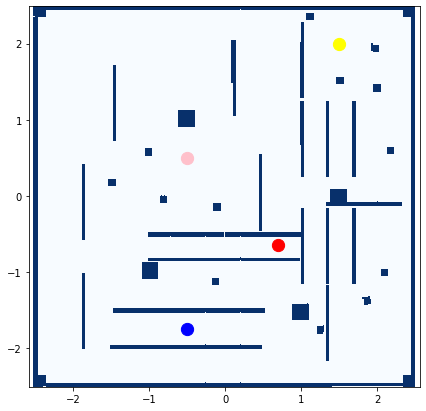

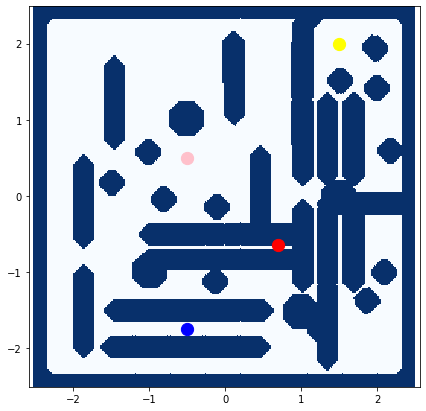

In [2]:
%%time
iteracionesDilatacion = 6
resolucion = 0.02
gmap = cntr.getMapas(iteracionesDilatacion,resolucion)

In [28]:
# Mascara para definir el coste de la 8 vecindad
vecinos = np.array([[1, 0, 1],
          [0, 1, 1],
          [-1, 0, 1],
          [0, -1, 1],
          [-1, -1, np.sqrt(2)],
          [-1, 1, np.sqrt(2)],
          [1, -1, np.sqrt(2)],
          [1, 1, np.sqrt(2)]])

<font size="4"><br><br>
    Ejecute el fragemtno inferiro para calcular el camino que usted quiera
</font>


***********************************************************
* En el mapa hay 4 puntos,  [Rosa, Rojo, Amarillo, Azul]  *
* El robot parte de la casilla Verde y pasara por los dos *
* puntos seleccionados calculando el camino mas corto.    *
***********************************************************

Introduzca el primer color:Rojo
Introduzca el segundo color: Azul

Obteniendo la posicion del robot
La posicion inicial del robot es: -1.97515070438385 2.0000832080841064

Calculando el camino mas corto para los colores: Rojo Azul...
Calculando camino...
Calculando camino...
Camino encontrado.

CPU times: user 2min 53s, sys: 1.77 s, total: 2min 55s
Wall time: 3min 2s


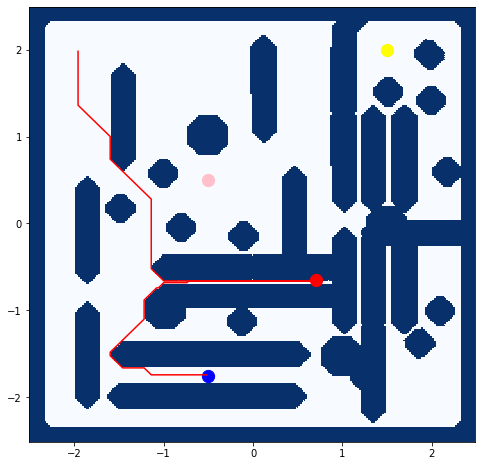

In [52]:
%%time
path = cntr.planificaCamino(gmap,vecinos,resolucion)

In [53]:
# Se guarda el camino, no es necesario para la ejecucion del sistema
cntr.Calculador_Camino_Tools.guardaRuta('camino_masCorto',path)

CSV guardado correctamente.


In [54]:
# Lectura de camino, no es necesario para la ejecucion del sistema
path = np.array(pd.read_csv('caminos_inter/camino_masCorto.csv'))

<br>

# Pure Pursuit && posicion real<br>
- Lfc: distancia minima al puto objetivo _ (m) df: 0.1<br>
- Kp: constante de proporcion para alzanzar la velocidad objetivo _ [0,1] df: 0.1<br>
- k: constante de timepo para estimar la distancia que se recorre _ (s) df: 0.05<br>
- dt: intervalo de tiempo para el control del robot _ (s) df: 0.5<br>
- dtGiro: intervalo de timepo para el giro del robot _ (s) df: 1<br>
- target_speed: velocidad maxima que alcanzara el robot _ (m,s) df: 0.05<br>   
- loc: false por defecto

<br>
<font size="5">
Configuracion optima
</font>

Ejecutando Simulacion...
Simulacion terminada


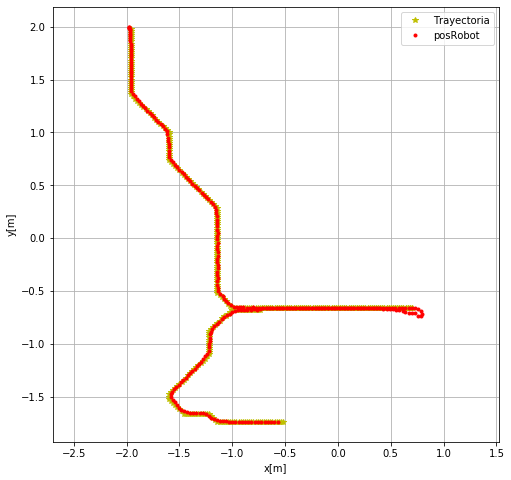

In [55]:
Lfc = 0.05 # m
Kp = 0.1 # [0,1]
k = 0.03 # (s)
dt = 1 # (s)
dtGiro = 1 # (s)
target_speed = 0.03 # (m/s)

cntr.simulacionTrajectoriaFP(Lfc,Kp,k,dt,dtGiro,target_speed,path,gmap)

# Valores para la simulacion Filtro de Particulas && Pure Pursuit <br>

simulacionTrajectoria(): funcion para ejecutar la tejectori obtenida
- Lfc: distancia minima al puto objetivo _ (m) df: 0.1<br>
- Kp: constante de proporcion para alzanzar la velocidad objetivo _ [0,1] df: 0.1<br>
- k: constante de timepo para estimar la distancia que se recorre _ (s) df: 0.05<br>
- dt: intervalo de tiempo para el control del robot _ (s) df: 0.5<br>
- dtGiro: intervalo de timepo para el giro del robot _ (s) df: 1<br>
- target_speed: velocidad maxima que alcanzara el robot _ (m,s) df: 0.05<br>
- path: array con el camino que sigue el robot _ df: None<br>
- Sensor_range: alcance del sensor _ (m) df: 2<br>
- EXTEND_AREA: dimendion del mapa _ (m) df: 5<br>
- N: numero que se desean crear _ df: 100<br>
- gmap: objeto que contien las caracteristicas del mapa _ df: None<br>
- loc: booleano que determina si se activa o no el filtro de particulas por defecto False _ df: False<br><br>

Filtro de Particulas Activado
Ejecutando Simulacion...
Error el la conexion con el simulador, ejecute este fragmento de nuevo


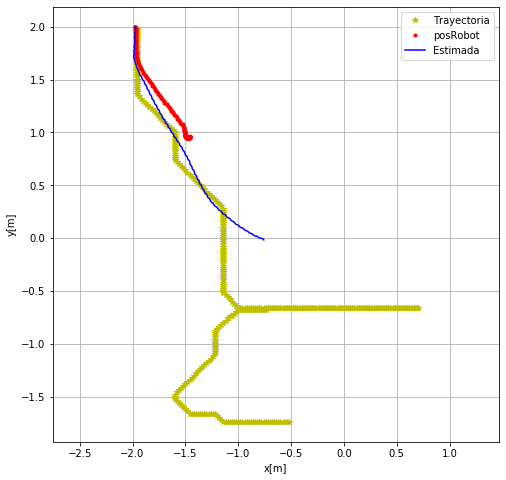

In [64]:
Lfc = 0.001 # m
Kp = 0.1 # [0,1]
k = 0.03 # (s)
dt = 2 # (s)
dtGiro = 6 # (s)
target_speed = 0.005 # (m/s)

sensor_range = 2.0 # (m)
EXTEND_AREA = 5.0 # (m)
N = 5000 #

loc = True # bool

cntr.simulacionTrajectoriaFP(Lfc,Kp,k,dt,dtGiro,target_speed,path,sensor_range,EXTEND_AREA,N,gmap,loc)

# Valores para la simulacion Filtro de Bayes && Pure Pursuit<br>

simulacionTrajectoria(): funcion para ejecutar la tejectori obtenida
- Lfc: distancia minima al puto objetivo _ (m) df: 0.1<br>
- Kp: constante de proporcion para alzanzar la velocidad objetivo _ [0,1] df: 0.1<br>
- k: constante de timepo para estimar la distancia que se recorre _ (s) df: 0.05<br>
- dt: intervalo de tiempo para el control del robot _ (s) df: 0.5<br>
- dtGiro: intervalo de timepo para el giro del robot _ (s) df: 1<br>
- target_speed: velocidad maxima que alcanzara el robot _ (m,s) df: 1<br>
- path: array con el camino que sigue el robot _ df: None<br>
- Sensor_range: alcance del sensor _ (m) df: 2<br>
- EXTEND_AREA: dimendion del mapa _ (m) df: 5<br>
- gmap: objeto que contien las caracteristicas del mapa _ df: None<br>
- loc: booleano que determina si se activa o no el filtro de particulas _ df: False<br>
- MOTION_STD: desviacion tipica del movimiento del robot _ df: 0.2<br>
- RANGE_STD: desviacion tipica del rando de los sensores _ df: 0.2<br>

<br>Ejecucion probando nuevos valores

Filtro de Bayes Activado
Ejecutando Simulacion...
Error el la conexion con el simulador, ejecute este fragmento de nuevo


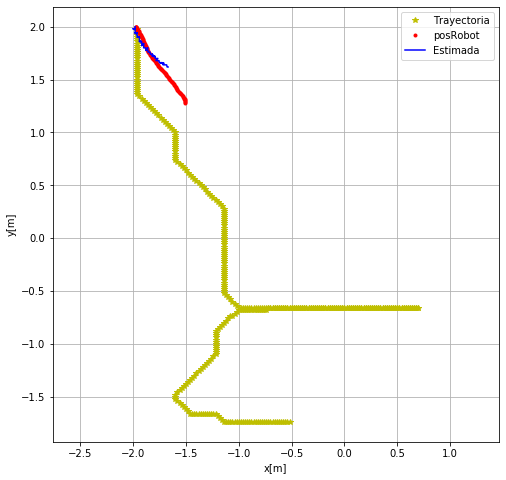

In [68]:
Lfc = 0.001 # m
Kp = 0.1 # [0,1]
k = 0.05 # (s)
dt = 3 # (s)
dtGiro = 12 # (s)
target_speed = 0.001 # (m/s)
sensor_range = 2 # m

EXTEND_AREA = 5.0 # m
MOTION_STD = 0.2 # m
RANGE_STD = 0.2 # m
loc = True

cntr.simulacionTrajectoriaFB(Lfc, Kp, k, dt, dtGiro, target_speed, path, sensor_range, EXTEND_AREA, gmap, loc, MOTION_STD, RANGE_STD)

<br><br><br><br><br><br><br><br><br><br><br>